# WeatherPy

### Background:
LATITUDE:
Lines of latitude measure north --> south position between the poles. 
The equator is defined as 0 degrees, the North Pole is 90 degrees north, and the South Pole is 90 degrees south.
Lines of latitude are all parallel to each other, thus they are often referred to as parallels.

LONGITUDE:
Lines of longitude, or meridians, run between the North and South Poles. They measure east --> west position.
The prime meridian is assigned the value of 0 degrees, and runs through Greenwich, England.
Meridians to the west of the prime meridian are measured in degrees west and likewise those to the east of 
the prime meridian are measured to by their number of degrees east.

![alt text](lon_lat.GIF "Latitude & Longitude Map")

Additional Information can be found at:
https://www.nationalgeographic.org/activity/introduction-latitude-longitude/

## Analysis

##### 1. The highest temperature is concentrated above the equator between 20 - 40 degres. 
#####    But the most confortable temperature is closer to the equator and as expected the further away from the equator
#####    the colder it is.
##### 2. Based on the plot, it shows that the humidity is less in the area where the heat is greater (20 - 40 deg).
#####    There is no humidity closer to the poles.
##### 3. The wind speed is higher in the north part of the equator. Wind Speed is concentrated on the 5 - 15 MPH.
###   ** NOTE: This is just based on a small population compared with all the cities in the world **

In [1]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import json
from citipy import citipy
import time
from datetime import datetime
# import unidecode
import numpy as np
#from math import sqrt
import openweathermapy as ow

In [2]:
# create variables to be used and getting the Api Key
from config import api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Generating the 500 Cities List

#### To make sure that I least I get 500, I am generating up to 1600 since some of them could be repeated

In [3]:
# Generate the Data Frame with 500 random latitude and longitude
random_loc_data = pd.DataFrame({
    "rand_lat": [np.random.uniform(-90,90) for x in range(1600)],
    "rand_long": [np.random.uniform(-180, 180) for x in range(1600)]
})
# Add City and Country colums
random_loc_data['City'] = ""
random_loc_data['Country'] = ""

# Find above informtion using citiPy
for index, row in random_loc_data.iterrows():
    lat = row['rand_lat']
    lng = row['rand_long']
    random_loc_data.set_value(index, 'City', citipy.nearest_city(lat, lng).city_name)
    random_loc_data.set_value(index, 'Country', citipy.nearest_city(lat, lng).country_code)
random_loc_data.head()
# len(random_loc_data['city'].value_counts())

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,rand_lat,rand_long,City,Country
0,31.062669,82.162998,jumla,np
1,-3.377952,-90.940693,puerto ayora,ec
2,-67.859320,97.929406,busselton,au
3,-30.300716,-39.263330,arraial do cabo,br
4,-75.562528,60.684372,taolanaro,mg


In [4]:
# Delete Lat and Long data in case that they are repeated
random_loc_data = random_loc_data.drop_duplicates(['City', 'Country'])
random_loc_data = random_loc_data.dropna()
# len(random_loc_data['city'].value_counts())
# random_loc_data.head()

In [5]:
# Since there is nop need to keep the Latitude and Longitude information, this will be deleted
random_loc_data = random_loc_data[['City', 'Country']]
#random_loc_data.head()

In [6]:
# Getting the New Data Frame being built
random_loc_data['Cloudiness'] = ""
random_loc_data['Date'] = ""
random_loc_data['Humidity'] = ""
random_loc_data['Lat'] = ""
random_loc_data['Lng'] = ""
random_loc_data['Max_Temp'] = ""
random_loc_data['Temp'] = ""
random_loc_data['Wind_Speed'] = ""
counter = 0 # breaking
city_err_list = []
no_data = 0

# Making the multiple API Calls

In [7]:
# getting the data
for index, row in random_loc_data.iterrows():
    print('Now retrieving data for city #%s: %s, %s' % (index, row['City'], row['Country']))
    city = row['City']
    country = row['Country']
    response = requests.get(query_url + city, country)
    print(response.url)
    weather_json = response.json()
    try:
        random_loc_data.set_value(index, 'Cloudiness', weather_json['clouds']['all'])
        random_loc_data.set_value(index, 'Date', weather_json['dt'])
        random_loc_data.set_value(index, 'Humidity', weather_json['main']['humidity'])
        random_loc_data.set_value(index, 'Lat', weather_json['coord']['lat'])
        random_loc_data.set_value(index, 'Lng', weather_json['coord']['lon'])
        random_loc_data.set_value(index, 'Max_Temp', weather_json['main']['temp_max'])
        random_loc_data.set_value(index, 'Temp', weather_json['main']['temp'])
        random_loc_data.set_value(index, 'Wind_Speed', weather_json['wind']['speed'])
    except:
        print('------------------------------------------')
        print(response)
        print('Missing Current Weather Info for city #%s: %s, %s' % (index, row['City'], row['Country']))
        city_err_list.append(index)
        no_data += 1
    print('---------------------------------------------------------------------------')
print('-------------------- DATA RETRIEVAL ---------------------')
print('--------------------  IS COMPLETE   ---------------------')

Now retrieving data for city #0: jumla, np
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=jumla&np
---------------------------------------------------------------------------
Now retrieving data for city #1: puerto ayora, ec


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=puerto%20ayora&ec
---------------------------------------------------------------------------
Now retrieving data for city #2: busselton, au
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=busselton&au
---------------------------------------------------------------------------
Now retrieving data for city #3: arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=arraial%20do%20cabo&br
---------------------------------------------------------------------------
Now retrieving data for city #4: taolanaro, mg
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=taolanaro&mg
------------------------------------------
<Response [404]>
Missing Current Weather Info for city #4: taolanaro, mg
------------------------------

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=auki&sb
---------------------------------------------------------------------------
Now retrieving data for city #37: sitka, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=sitka&us
---------------------------------------------------------------------------
Now retrieving data for city #38: quatre cocos, mu
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=quatre%20cocos&mu
---------------------------------------------------------------------------
Now retrieving data for city #39: ribeira grande, pt
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=ribeira%20grande&pt
---------------------------------------------------------------------------
Now retrieving data for city #40: college, us
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=rocha&uy
---------------------------------------------------------------------------
Now retrieving data for city #76: thompson, ca
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=thompson&ca
---------------------------------------------------------------------------
Now retrieving data for city #79: oranjemund, na
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=oranjemund&na
---------------------------------------------------------------------------
Now retrieving data for city #81: lebu, cl
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=lebu&cl
---------------------------------------------------------------------------
Now retrieving data for city #82: punta arenas, cl
http://api.openweathermap.org/data/2.5/weather?appi

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=port%20elizabeth&za
---------------------------------------------------------------------------
Now retrieving data for city #122: cururupu, br
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=cururupu&br
---------------------------------------------------------------------------
Now retrieving data for city #124: sistranda, no
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=sistranda&no
---------------------------------------------------------------------------
Now retrieving data for city #126: kapaa, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=kapaa&us
---------------------------------------------------------------------------
Now retrieving data for city #127: luzhou, cn
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=tessalit&ml
---------------------------------------------------------------------------
Now retrieving data for city #185: sampit, id
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=sampit&id
---------------------------------------------------------------------------
Now retrieving data for city #188: calbuco, cl
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=calbuco&cl
---------------------------------------------------------------------------
Now retrieving data for city #189: luderitz, na
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=luderitz&na
---------------------------------------------------------------------------
Now retrieving data for city #190: cape town, za
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=sao%20gabriel%20da%20cachoeira&br
---------------------------------------------------------------------------
Now retrieving data for city #244: roblin, ca
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=roblin&ca
---------------------------------------------------------------------------
Now retrieving data for city #248: isangel, vu
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=isangel&vu
---------------------------------------------------------------------------
Now retrieving data for city #250: sur, om
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=sur&om
---------------------------------------------------------------------------
Now retrieving data for city #252: esil, kz
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=novominskaya&ru
---------------------------------------------------------------------------
Now retrieving data for city #323: biak, id
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=biak&id
---------------------------------------------------------------------------
Now retrieving data for city #326: nome, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=nome&us
---------------------------------------------------------------------------
Now retrieving data for city #328: tautira, pf
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=tautira&pf
---------------------------------------------------------------------------
Now retrieving data for city #329: bodden town, ky
http://api.openweathermap.org/data/2.5/weather?appid=50

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=mountain%20home&us
---------------------------------------------------------------------------
Now retrieving data for city #398: nemuro, jp
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=nemuro&jp
---------------------------------------------------------------------------
Now retrieving data for city #399: carmen, mx
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=carmen&mx
---------------------------------------------------------------------------
Now retrieving data for city #404: new norfolk, au
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=new%20norfolk&au
---------------------------------------------------------------------------
Now retrieving data for city #406: camden, us
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=tateyama&jp
---------------------------------------------------------------------------
Now retrieving data for city #515: emerald, au
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=emerald&au
---------------------------------------------------------------------------
Now retrieving data for city #517: ancud, cl
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=ancud&cl
---------------------------------------------------------------------------
Now retrieving data for city #518: piacabucu, br
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=piacabucu&br
---------------------------------------------------------------------------
Now retrieving data for city #521: airai, pw
http://api.openweathermap.org/data/2.5/weather?appid=

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=heze&cn
---------------------------------------------------------------------------
Now retrieving data for city #605: sakaiminato, jp
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=sakaiminato&jp
---------------------------------------------------------------------------
Now retrieving data for city #606: valparaiso, cl
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=valparaiso&cl
---------------------------------------------------------------------------
Now retrieving data for city #607: taoudenni, ml
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=taoudenni&ml
---------------------------------------------------------------------------
Now retrieving data for city #610: hastings, us
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=alice%20springs&au
---------------------------------------------------------------------------
Now retrieving data for city #664: toliary, mg
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=toliary&mg
------------------------------------------
<Response [404]>
Missing Current Weather Info for city #664: toliary, mg
---------------------------------------------------------------------------
Now retrieving data for city #665: roald, no
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=roald&no
---------------------------------------------------------------------------
Now retrieving data for city #666: verkh-usugli, ru
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=verkh-usugli&ru
---------------------------------------------

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=hihifo&to
------------------------------------------
<Response [404]>
Missing Current Weather Info for city #725: hihifo, to
---------------------------------------------------------------------------
Now retrieving data for city #729: mogadishu, so
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=mogadishu&so
---------------------------------------------------------------------------
Now retrieving data for city #730: hilo, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=hilo&us
---------------------------------------------------------------------------
Now retrieving data for city #731: charagua, bo
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=charagua&bo
-------------------------------------------------------------

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=cidreira&br
---------------------------------------------------------------------------
Now retrieving data for city #836: san quintin, mx
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=san%20quintin&mx
---------------------------------------------------------------------------
Now retrieving data for city #837: banda aceh, id
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=banda%20aceh&id
---------------------------------------------------------------------------
Now retrieving data for city #839: olinda, br
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=olinda&br
---------------------------------------------------------------------------
Now retrieving data for city #842: nchelenge, zm
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=evensk&ru
---------------------------------------------------------------------------
Now retrieving data for city #921: bosobolo, cd
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=bosobolo&cd
---------------------------------------------------------------------------
Now retrieving data for city #923: kasulu, tz
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=kasulu&tz
---------------------------------------------------------------------------
Now retrieving data for city #925: half moon bay, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=half%20moon%20bay&us
---------------------------------------------------------------------------
Now retrieving data for city #926: hamilton, bm
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=acari&pe
---------------------------------------------------------------------------
Now retrieving data for city #1025: aswan, eg
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=aswan&eg
---------------------------------------------------------------------------
Now retrieving data for city #1028: chimbote, pe
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=chimbote&pe
---------------------------------------------------------------------------
Now retrieving data for city #1034: koshurnikovo, ru
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=koshurnikovo&ru
---------------------------------------------------------------------------
Now retrieving data for city #1036: ambilobe, mg
http://api.openweathermap.org/data/2.5/we

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=saint-francois&gp
---------------------------------------------------------------------------
Now retrieving data for city #1106: west bay, ky
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=west%20bay&ky
---------------------------------------------------------------------------
Now retrieving data for city #1107: mogochin, ru
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=mogochin&ru
------------------------------------------
<Response [404]>
Missing Current Weather Info for city #1107: mogochin, ru
---------------------------------------------------------------------------
Now retrieving data for city #1108: aksarka, ru
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=aksarka&ru
-----------------------------------------

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=xinzhou&cn
---------------------------------------------------------------------------
Now retrieving data for city #1195: vila franca do campo, pt
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=vila%20franca%20do%20campo&pt
---------------------------------------------------------------------------
Now retrieving data for city #1198: sorong, id
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=sorong&id
---------------------------------------------------------------------------
Now retrieving data for city #1200: ikalamavony, mg
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=ikalamavony&mg
---------------------------------------------------------------------------
Now retrieving data for city #1202: bayan, kw
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=pizarro&co
---------------------------------------------------------------------------
Now retrieving data for city #1294: lozuvatka, ua
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=lozuvatka&ua
---------------------------------------------------------------------------
Now retrieving data for city #1298: fairbanks, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=fairbanks&us
---------------------------------------------------------------------------
Now retrieving data for city #1303: parkes, au
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=parkes&au
---------------------------------------------------------------------------
Now retrieving data for city #1309: lawton, us
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=qaqortoq&gl
---------------------------------------------------------------------------
Now retrieving data for city #1419: ixtapa, mx
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=ixtapa&mx
---------------------------------------------------------------------------
Now retrieving data for city #1420: susurluk, tr
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=susurluk&tr
---------------------------------------------------------------------------
Now retrieving data for city #1422: moron, mn
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=moron&mn
---------------------------------------------------------------------------
Now retrieving data for city #1429: gari, ru
http://api.openweathermap.org/data/2.5/weather?appid=5

http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=ngukurr&au
------------------------------------------
<Response [404]>
Missing Current Weather Info for city #1533: ngukurr, au
---------------------------------------------------------------------------
Now retrieving data for city #1534: haslett, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=haslett&us
---------------------------------------------------------------------------
Now retrieving data for city #1536: kloulklubed, pw
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=kloulklubed&pw
---------------------------------------------------------------------------
Now retrieving data for city #1539: winslow, us
http://api.openweathermap.org/data/2.5/weather?appid=5085bcd3599c5fcf71b040c229f4852d&units=imperial&q=winslow&us
-----------------------------------------------

In [8]:
random_loc_data = random_loc_data.dropna()

In [9]:
random_loc_data.count()

City          645
Country       645
Cloudiness    645
Date          645
Humidity      645
Lat           645
Lng           645
Max_Temp      645
Temp          645
Wind_Speed    645
dtype: int64

In [10]:
# Save as a csv using "utf-8" encoding
random_loc_data.to_csv("random_city_data.csv", encoding="utf-8", index=False)

In [11]:
# Check the data types
# random_loc_data.dtypes

In [12]:
# Changing the column names to match the example
random_loc_data= random_loc_data[['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 
                                  'Lat', 'Lng', 'Temp',"Wind_Speed"]]

In [13]:
# Formating the data to be able to plot
random_loc_data["Lat"] = pd.to_numeric(random_loc_data.Lat, errors='coerce')
random_loc_data["Lng"] = pd.to_numeric(random_loc_data.Lng, errors='coerce')
random_loc_data["Temp"] = pd.to_numeric(random_loc_data.Temp, errors='coerce')
random_loc_data["Wind_Speed"] = pd.to_numeric(random_loc_data.Wind_Speed, errors='coerce')

In [14]:
# random_loc_data.dtypes

# Latitude vs Temperature Plot

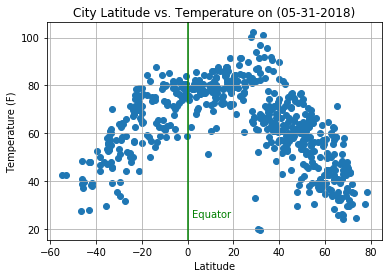

In [15]:
# Creating the first Graph --> Latitude vs. Temp
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.scatter(random_loc_data["Lat"], random_loc_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature on ({now})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# adding the Equator line just for reference
plt.axvline(0, color='green')
plt.annotate('Equator', xy=(2,25) ,color='green')

# Saving the plot
plt.savefig("LatitudeVSTemperature.png")

# Showing the plot
plt.show()

# Latitude vs. Humidity Plot

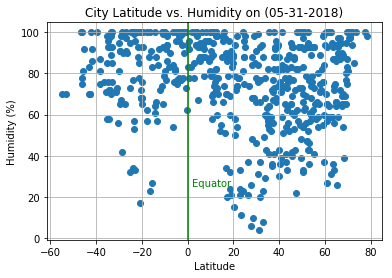

In [16]:
# Creating the second Graph --> Latitude vs. Humidity
plt.scatter(random_loc_data["Lat"], random_loc_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity on ({now})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# adding the Equator line just for reference
plt.axvline(0, color='green')
plt.annotate('Equator', xy=(2,25) ,color='green')

# Saving the plot
plt.savefig("LatitudeVSHumidity.png")

# Showing the plot
plt.show()

# Latitude vs. Cloudiness Plot

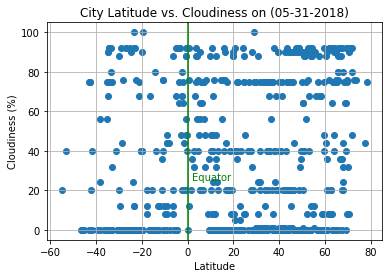

In [17]:
# Creating the third Graph --> Latitude vs. Cloudiness
plt.scatter(random_loc_data["Lat"], random_loc_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness on ({now})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# adding the Equator line just for reference
plt.axvline(0, color='green')
plt.annotate('Equator', xy=(2,25) ,color='green')
          
# Saving the plot
plt.savefig("LatitudeVSCloudiness.png")

# Showing the plot
plt.show()

# Latitude vs. Wind Speed Plot

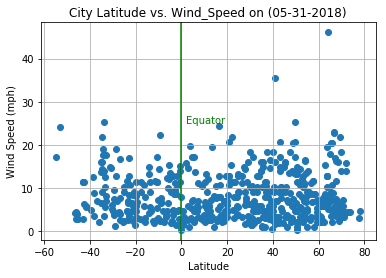

In [18]:
# Creating the fourth Graph --> Latitude vs. Wind Speed
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.scatter(random_loc_data["Lat"], random_loc_data["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind_Speed on ({now})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
          
# adding the Equator line just for reference
plt.axvline(0, color='green')
plt.annotate('Equator', xy=(2,25) ,color='green')

# Saving the plot
plt.savefig("LatitudeVSWindSpeed.png")

# Showing the plot
plt.show()